In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"2d7e3531-e9ac-484b-8a2c-df4122e0436a\"")

In [ ]:
hex_project_name = _hex_json.loads("\"ES Long Short Only Report\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

In [ ]:
pip install QuantStats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install QuantStats
#pip install matplotlib

In [ ]:
import pandas as pd

# specify the file path
file_path = 'https://github.com/alexbernal0/QEP/raw/main/ESLS23.xlsx'

# read in the 'Trades List' sheet
df = pd.read_excel(file_path, sheet_name='Trades List')

# Drop all columns except '#', 'Date/Time', and 'Profit/Loss'
df = df[['#', 'Date/Time', 'Profit/Loss']]

# Add a new column called 'Exit Date/Time' with the same data as 'Date/Time'
df['Exit Date/Time'] = df['Date/Time']

# Shift the contents of the 'Exit Date/Time' column up one row
df['Exit Date/Time'] = df['Exit Date/Time'].shift(-1)

# Shift the contents of the 'Profit/Loss' column up one row
df['Profit/Loss'] = df['Profit/Loss'].shift(-1)

# Drop all rows where there is a NaN in the '#' column
df = df.dropna(subset=['#'])

# Switch places of 'Profit/Loss' and 'closedDate' columns
df = df[['#', 'Date/Time', 'Exit Date/Time', 'Profit/Loss']]

df['CumPL'] = 50000 + df['Profit/Loss'].cumsum()

# Convert the 'Profit/Loss' and 'equity' columns to numeric data type
df['Profit/Loss'] = pd.to_numeric(df['Profit/Loss'], errors='coerce')
df['CumPL'] = pd.to_numeric(df['CumPL'], errors='coerce')

#Create a new column called 'returnPerc'
df['returnPerc'] = df['CumPL'].pct_change()
# Set the first value of 'returnPerc' to 0
df.at[df.index[0], 'returnPerc'] = -0.002

# Convert the date column to a pandas datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date', inplace=True)

df.head()


,#,Date/Time,Exit Date/Time,Profit/Loss,CumPL,returnPerc
Date,,,,,,
2007-11-02 10:30:00,1.0,2007-11-02 10:30:00,2007-11-05 10:00:00,-100.0,49900.0,-0.002000
2007-11-05 13:00:00,2.0,2007-11-05 13:00:00,2007-11-06 10:00:00,-650.0,49250.0,-0.013026
2007-11-06 10:30:00,3.0,2007-11-06 10:30:00,2007-11-07 10:00:00,-250.0,49000.0,-0.005076
2007-11-07 11:30:00,4.0,2007-11-07 11:30:00,2007-11-08 10:00:00,1362.5,50362.5,0.027806
2007-11-07 11:30:00,5.0,2007-11-07 11:30:00,2007-11-08 10:00:00,1500.0,51862.5,0.029784


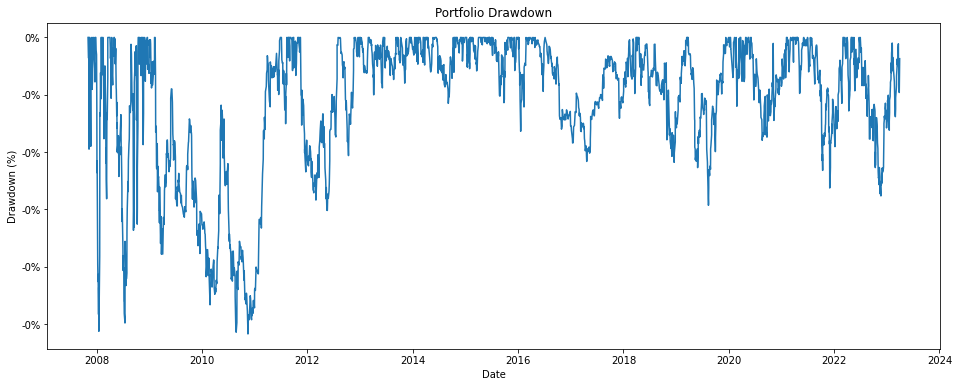

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Calculate the maximum equity up to each date
cum_max_equity = df['CumPL'].cummax()

# Calculate the drawdown as a percentage from the maximum equity
drawdown = (df['CumPL'] - cum_max_equity) / cum_max_equity

# Set the figure size
plt.figure(figsize=(16,6))

# Plot the drawdown
plt.plot(drawdown)
plt.title('Portfolio Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')

# Format y-axis as percentage
fmt = '%.0f%%' 
yticks = mtick.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)

plt.show()

In [ ]:
# Calculate the cumulative return and drawdown
cumulative_return = (1 + df['CumPL'].pct_change()).cumprod()
drawdown = (cumulative_return.cummax() - cumulative_return) / cumulative_return.cummax()

# Calculate the average drawdown
average_drawdown = -1 * drawdown.mean()

# Calculate the average drawdown time in days
drawdown_duration = drawdown[drawdown > 0].index.to_series().diff().mean().days

# Calculate the recovery factor
recovery_factor = -1 * cumulative_return.min() / average_drawdown

# Print the portfolio statistics

print(f"Average drawdown: {average_drawdown:.2%}")
print(f"Average drawdown duration: {drawdown_duration} days")
print(f"Recovery factor: {recovery_factor:.2f}")

Average drawdown: -5.49%
Average drawdown duration: 2 days
Recovery factor: 17.10


In [ ]:
# Calculate the total return of the portfolio
total_return = df['CumPL'][-1] / df['CumPL'][0] - 1

# Calculate the number of years that the portfolio has been invested
num_years = (df.index[-1] - df.index[0]).days / 365.25

# Calculate the CAGR
cagr = (1 + total_return)**(1/num_years) - 1

print('CAGR: {:.2%}'.format(cagr))

CAGR: 16.61%


In [ ]:
# Calculate the monthly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()

# Display the monthly returns as a DataFrame
monthly_returns_df = pd.DataFrame({'Monthly Return': monthly_returns * 100})
print(monthly_returns_df.tail(50))

            Monthly Return
Date                      
2019-02-28        2.406147
2019-03-31        1.434777
2019-04-30       -1.641578
2019-05-31       -8.315192
2019-06-30        6.835270
2019-07-31       -3.010405
2019-08-31       -1.815783
2019-09-30       -0.548091
2019-10-31        6.755556
2019-11-30        3.360533
2019-12-31        1.901141
2020-01-31       -2.200860
2020-02-29       -0.177832
2020-03-31        3.417225
2020-04-30        5.853796
2020-05-31        3.231056
2020-06-30       -0.444266
2020-07-31       -2.562331
2020-08-31       -2.966552
2020-09-30        1.580390
2020-10-31        2.931743
2020-11-30        1.100853
2020-12-31       -1.025493
2021-01-31        0.774179
2021-02-28        2.772563
2021-03-31        8.481102
2021-04-30        2.321063
2021-05-31       -0.237981
2021-06-30        1.707905
2021-07-31       -0.092320
2021-08-31       -0.339652
2021-09-30       -4.693647
2021-10-31       -3.473391
2021-11-30       -0.716407
2021-12-31        1.819030
2

In [ ]:
# Calculate the yearly returns
yearly_returns = df['CumPL'].resample('Y').last().pct_change()

# Display the yearly returns as a DataFrame
yearly_returns_df = pd.DataFrame({'Yearly Return': yearly_returns * 100})
print(yearly_returns_df.head(20))

            Yearly Return
Date                     
2007-12-31            NaN
2008-12-31      98.907578
2009-12-31     -14.244617
2010-12-31      -6.739860
2011-12-31      48.288642
2012-12-31      20.052926
2013-12-31      10.506980
2014-12-31      22.589761
2015-12-31      25.193220
2016-12-31      -1.317737
2017-12-31       2.187752
2018-12-31       2.391522
2019-12-31      10.573427
2020-12-31       8.648495
2021-12-31       8.009546
2022-12-31       7.698526
2023-12-31       6.552742


In [ ]:
# Calculate monthly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()

# Find the best and worst performing months
best_month = monthly_returns.idxmax().strftime('%B %Y')
best_month_return = monthly_returns.max() * 100
worst_month = monthly_returns.idxmin().strftime('%B %Y')
worst_month_return = monthly_returns.min() * 100

# Display the results
print(f"Best performing month: {best_month}, Return: {best_month_return:.2f}%")
print(f"Worst performing month: {worst_month}, Return: {worst_month_return:.2f}%")

Best performing month: March 2008, Return: 23.84%
Worst performing month: June 2008, Return: -10.29%


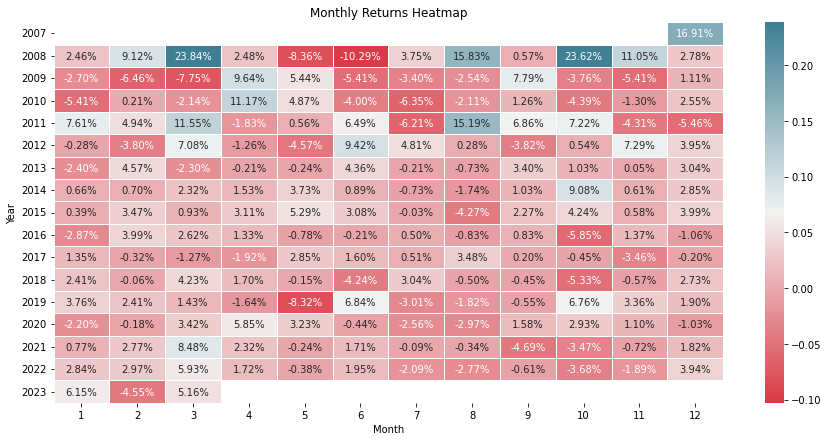

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate monthly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()

# Create a pivot table of monthly returns
monthly_returns_pivot = monthly_returns.reset_index().pivot_table(index=monthly_returns.index.year, columns=monthly_returns.index.month, values='CumPL')

# Create heatmap
fig, ax = plt.subplots(figsize=(15,7))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(monthly_returns_pivot, annot=True, fmt=".2%", linewidths=0.5, ax=ax, cmap=cmap)
plt.title('Monthly Returns Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [ ]:
# Calculate yearly returns
yearly_returns = df['CumPL'].resample('Y').last().pct_change()

# Find the best and worst performing years
best_years = yearly_returns.sort_values(ascending=False).head(3)
worst_years = yearly_returns.sort_values().head(3)

# Display the results
print("Best performing years:")
for year, return_ in best_years.items():
    print(f"- Year: {year.year}, Return: {return_*100:.2f}%")

print("\nWorst performing years:")
for year, return_ in worst_years.items():
    print(f"- Year: {year.year}, Return: {return_*100:.2f}%")

Best performing years:
- Year: 2008, Return: 98.91%
- Year: 2011, Return: 48.29%
- Year: 2015, Return: 25.19%

Worst performing years:
- Year: 2009, Return: -14.24%
- Year: 2010, Return: -6.74%
- Year: 2016, Return: -1.32%


In [ ]:
# Calculate monthly, quarterly, and yearly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()
quarterly_returns = df['CumPL'].resample('Q').last().pct_change()
yearly_returns = df['CumPL'].resample('Y').last().pct_change()

# Calculate percentage of positive months, quarters, and years
positive_months = (monthly_returns > 0).mean() * 100
positive_quarters = (quarterly_returns > 0).mean() * 100
positive_years = (yearly_returns > 0).mean() * 100

#Display the results
print(f"Percentage of positive months: {positive_months:.2f}%")
print(f"Percentage of positive quarters: {positive_quarters:.2f}%")
print(f"Percentage of positive years: {positive_years:.2f}%")

Percentage of positive months: 56.76%
Percentage of positive quarters: 62.90%
Percentage of positive years: 76.47%


In [ ]:
df = df.reset_index()

# calculate the drawdowns
df['peak'] = df['CumPL'].cummax()
df['drawdown'] = df['CumPL'] - df['peak']
df['drawdown_pct'] = df['drawdown'] / df['peak'] * 100

# get the top 10 drawdowns
top_10_drawdowns = df.sort_values('drawdown_pct').head(10)[['Date', 'drawdown_pct']]

# rename columns
top_10_drawdowns = top_10_drawdowns.rename(columns={'Date': 'Start Date', 'drawdown_pct': 'Drawdown (%)'})

# reset index
top_10_drawdowns = top_10_drawdowns.reset_index(drop=True)

# display the table
print(top_10_drawdowns[['Start Date', 'Drawdown (%)']])

           Start Date  Drawdown (%)
0 2010-11-15 11:30:00    -25.854737
1 2010-08-25 14:30:00    -25.701650
2 2008-01-16 13:30:00    -25.619129
3 2010-08-23 10:30:00    -25.497534
4 2010-11-16 11:00:00    -25.480524
5 2010-08-24 10:30:00    -25.089301
6 2008-07-15 16:00:00    -24.899403
7 2010-08-30 11:30:00    -24.868175
8 2010-12-10 10:30:00    -24.613029
9 2010-11-24 11:00:00    -24.613029


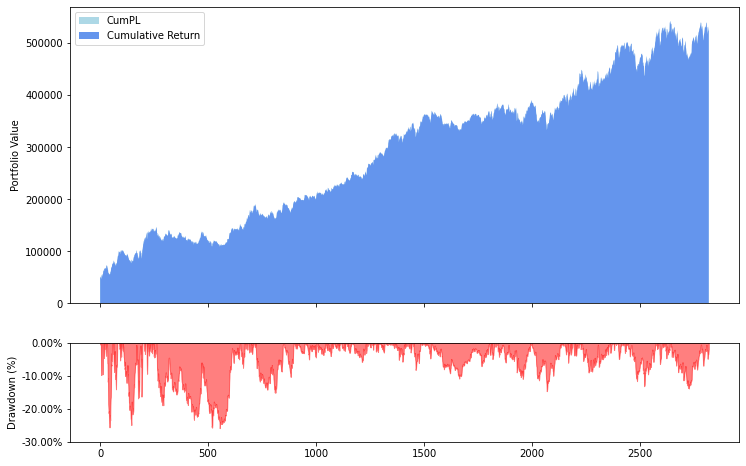

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the cumulative return and drawdown
cumulative_return = (1 + df['CumPL'].pct_change()).cumprod()
drawdown = (cumulative_return.cummax() - cumulative_return) / cumulative_return.cummax()

# Invert the drawdown so it shows a negative number
drawdown = -1 * drawdown

# Create a stacked line plot with drawdown plot beneath it
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].stackplot(df.index, df['CumPL'], cumulative_return-df['CumPL'], labels=['CumPL', 'Cumulative Return'], colors=['lightblue', 'cornflowerblue'])
ax[1].fill_between(df.index, drawdown, 0, color='red', alpha=0.5)
ax[1].set_ylim(-0.3, 0)
ax[0].legend(loc='upper left')
ax[0].set_ylabel('Portfolio Value')
ax[1].set_ylabel('Drawdown (%)')
ax[1].yaxis.set_major_formatter('{x:.2%}')
plt.show()

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# calculate daily returns
daily_returns = df['CumPL'].pct_change()

# calculate portfolio statistics
cumulative_return = (df['CumPL'].iloc[-1] / df['CumPL'].iloc[0]) - 1
average_daily_return = daily_returns.mean()
std_daily_return = daily_returns.std()
annualized_volatility = std_daily_return * np.sqrt(252)
sharpe_ratio = np.sqrt(252) * (average_daily_return / std_daily_return)
sortino_ratio = np.sqrt(252) * (average_daily_return / daily_returns[daily_returns < 0].std())
var_95 = norm.ppf(0.05, average_daily_return, std_daily_return) * df['CumPL'].iloc[-1]
daily_var_95 = -var_95 / len(df.index)
average_monthly_return = ((1 + cumulative_return) ** (1 / len(df.index)) - 1) * 100



# display portfolio statistics
print(f"Cumulative return: {cumulative_return.item():.2%}")
print(f"Average daily return: {average_daily_return.item():.2%}")
print(f"Daily return volatility: {std_daily_return.item():.2%}")
print(f"Annualized volatility: {annualized_volatility.item():.2%}")
print(f"Sharpe ratio: {sharpe_ratio.item():.2f}")
print(f"Sortino ratio: {sortino_ratio.item():.2f}")
print(f"95% VaR (1 day): {var_95.item():.2f}")
print(f"Daily VaR (95%, 1 day): {daily_var_95.item():.2f}")
print(f"Average monthly return: {average_monthly_return:.2f}%")

Cumulative return: 966.81%
Average daily return: 0.09%
Daily return volatility: 1.32%
Annualized volatility: 21.03%
Sharpe ratio: 1.11
Sortino ratio: 1.49
95% VaR (1 day): -11105.72
Daily VaR (95%, 1 day): 3.94
Average monthly return: 0.08%


In [ ]:
# Drop all columns except '#', 'Date/Time', and 'Profit/Loss'
df = df[['Date/Time', 'returnPerc']]

# Convert the date/time column to a pandas datetime object
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Rename the date/time column to just 'date'
df = df.rename(columns={'Date/Time': 'Date'})

# Set the date column as the index
df.set_index('Date', inplace=True)

df.index = pd.to_datetime(df.index, utc=True).tz_localize(None)



df

,returnPerc
Date,
2007-11-02 10:30:00,-0.002000
2007-11-05 13:00:00,-0.013026
2007-11-06 10:30:00,-0.005076
2007-11-07 11:30:00,0.027806
2007-11-07 11:30:00,0.029784
...,...
2023-03-29 10:30:00,0.008764
2023-03-29 10:30:00,0.005472
2023-03-30 13:30:00,0.000859


Performance Metrics

                           Strategy
-------------------------  ----------
Start Period               2007-11-02
End Period                 2023-03-31
Risk-Free Rate             0.0%
Time in Market             98.0%

Cumulative Return          964.67%
CAGR﹪                     16.58%

Sharpe                     1.11
Prob. Sharpe Ratio         99.99%
Smart Sharpe               0.99
Sortino                    1.69
Smart Sortino              1.5
Sortino/√2                 1.19
Smart Sortino/√2           1.06
Omega                      1.25

Max Drawdown               -25.85%
Longest DD Days            865
Volatility (ann.)          21.03%
Calmar                     0.64
Skew                       0.1
Kurtosis                   9.79

Expected Daily %           0.08%
Expected Monthly %         1.29%
Expected Yearly %          14.93%
Kelly Criterion            10.32%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.09%
Expected Shortfall (cVaR)  -2.09%

Max Consecutive Wins      

None

5 Worst Drawdowns

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2009-02-11,2010-11-15,2011-06-27,865,-25.854737,-25.089301
2,2007-12-28,2008-01-16,2008-01-31,34,-25.619129,-24.150299
3,2008-05-06,2008-07-15,2008-10-15,161,-24.899403,-24.070235
4,2011-11-15,2012-05-18,2012-08-01,259,-15.086150,-14.296988
5,2019-03-27,2019-08-13,2019-12-11,259,-14.634693,-14.061600


Strategy Visualization

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


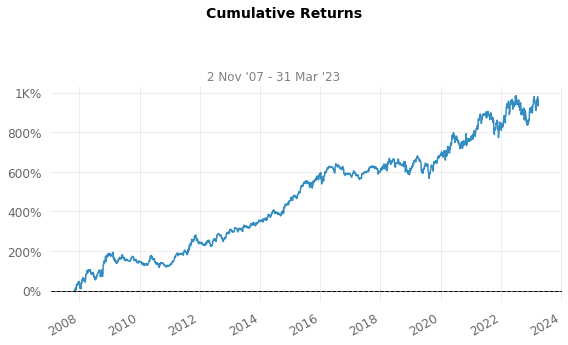

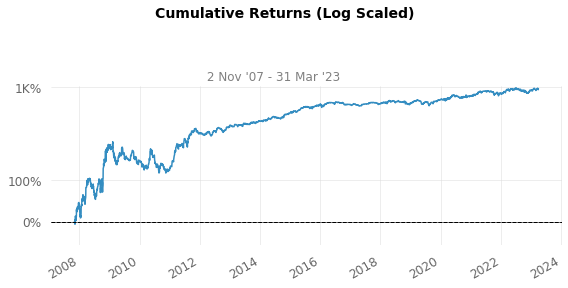

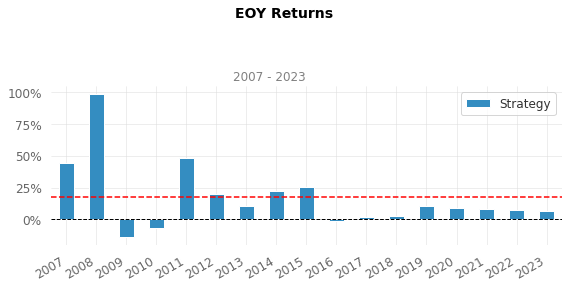

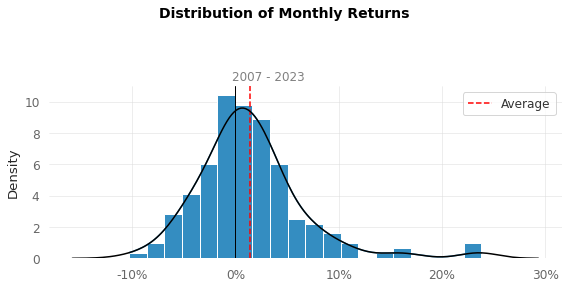

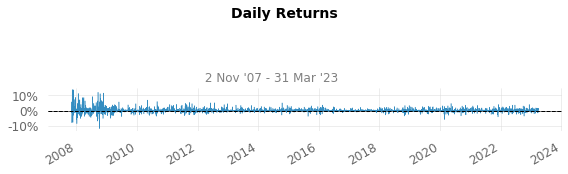

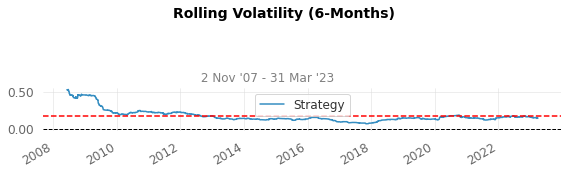

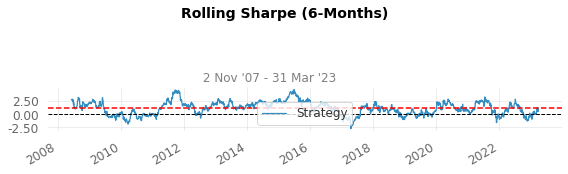

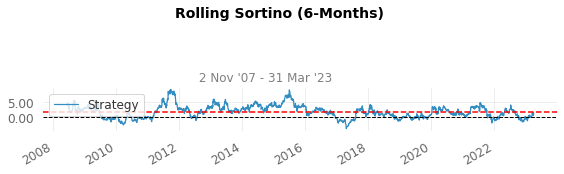

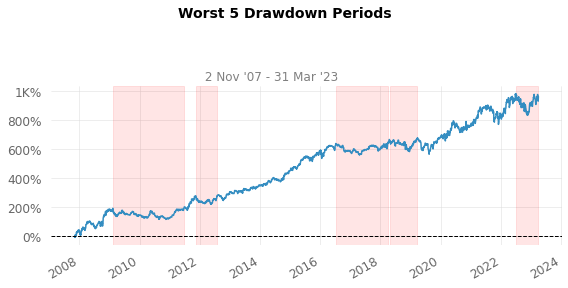

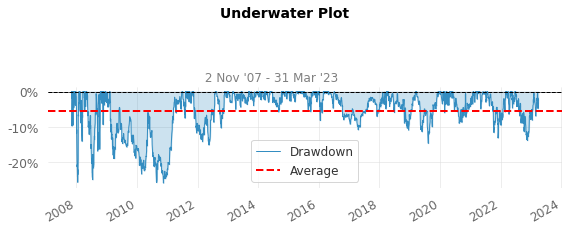

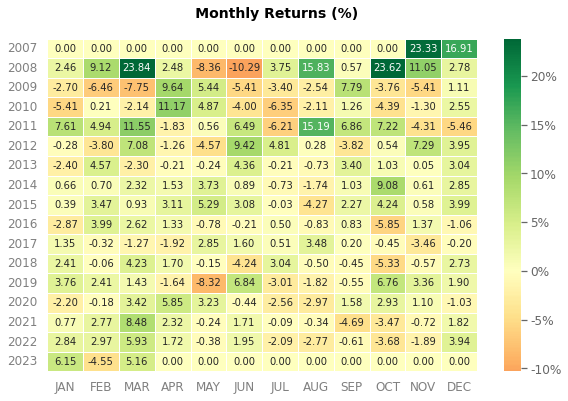

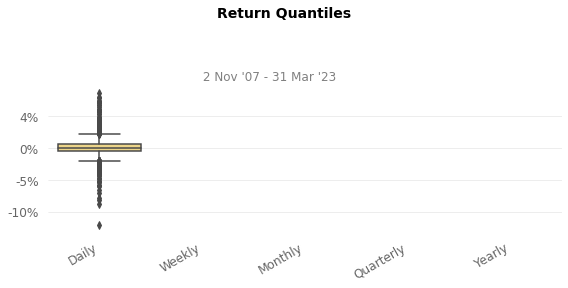

In [ ]:
#Convert dataframe to a series
series = pd.Series(df.returnPerc, index=df.index)
import quantstats as qs
#calc the quantstats report
qs.extend_pandas()
qs.reports.full(series)

In [ ]:
qs.reports.html(series,title='ES Long Short')